In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:

with open('./portfolio_summary.json', 'r', encoding='utf-8') as f:
    data = json.load(f)  

# make DataFrame
df = pd.DataFrame(data)

# Convert datetime to date type
df['datetime'] = pd.to_datetime(df['datetime'])

In [3]:
## year show 

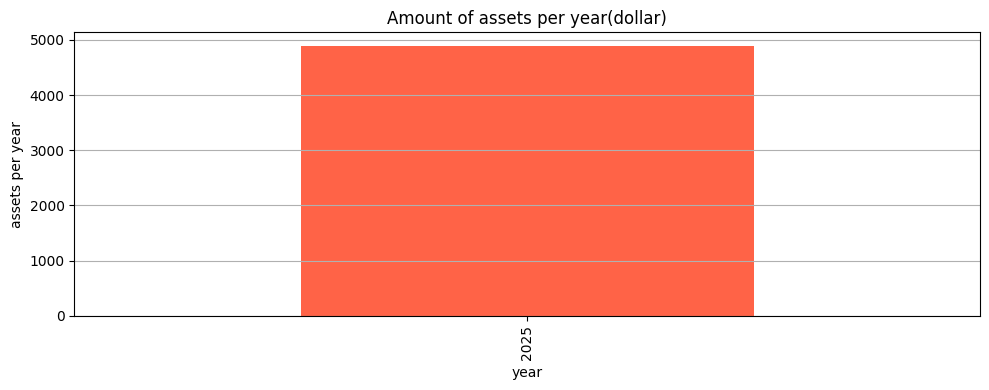

In [4]:
df['year'] = df['datetime'].dt.year

# Sort by time
df_sorted = df.sort_values('datetime')

# Get the latest total_dollar value for each year
last_values = df_sorted.groupby('year').tail(1).set_index('year')['total_dollar']

# Draw a diagram
last_values.plot(kind='bar', color='tomato', figsize=(10, 4))
plt.title("Amount of assets per year(dollar)")
plt.ylabel("assets per year")
plt.xlabel("year")
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('Amount of assets per year(dollar)', bbox_inches='tight', dpi=300)
#plt.show()

In [5]:
# month show 

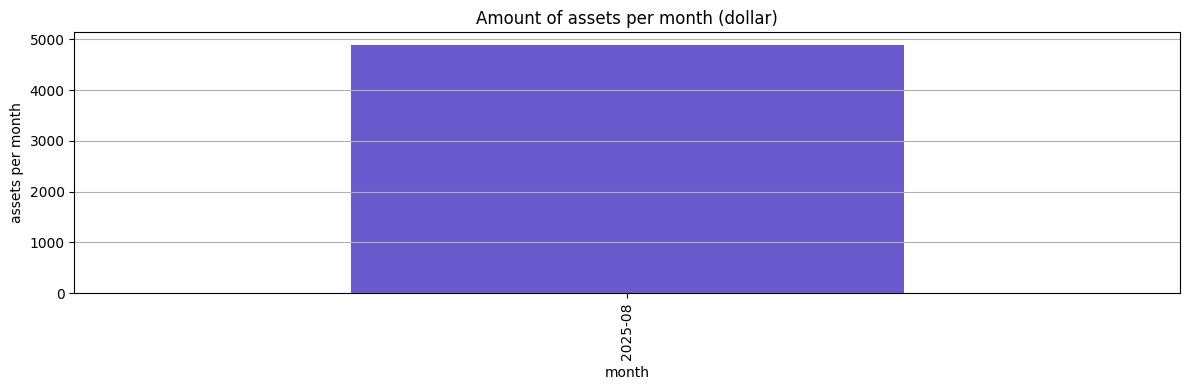

In [6]:
df['month'] = df['datetime'].dt.to_period('M')  # Monthly period

# Sort by date
df_sorted = df.sort_values('datetime')

# Get the last row of each month
last_monthly_values = df_sorted.groupby('month').tail(1).set_index('month')['total_dollar']

# Draw a diagram
last_monthly_values.plot(kind='bar', figsize=(12, 4), color='slateblue')
plt.title("Amount of assets per month (dollar)")
plt.ylabel("assets per month")
plt.xlabel("month")
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('Amount of assets per month (dollar)', bbox_inches='tight', dpi=300)

#plt.show()


In [7]:
## day

Last daily amount per month 2025-08:
 day
2025-08-04    4892.98
Freq: D, Name: total_dollar, dtype: float64


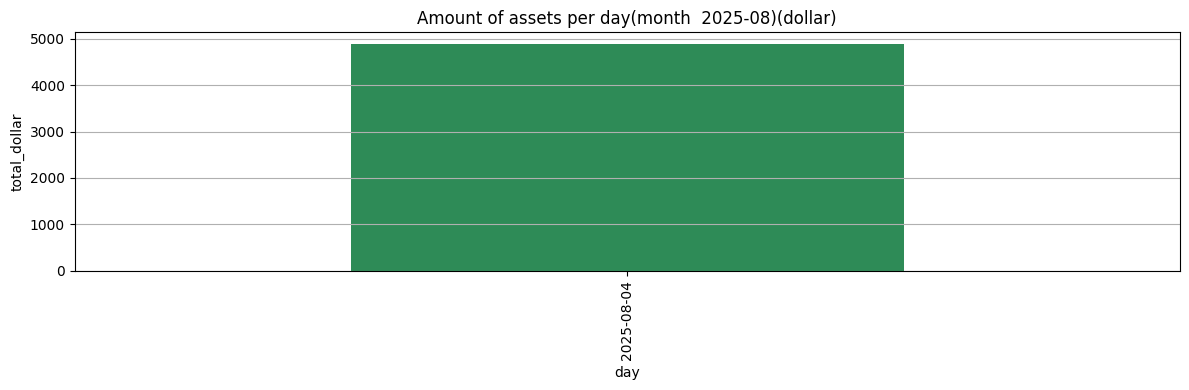

In [8]:

# Convert date and add month and day columns
df['month'] = df['datetime'].dt.to_period('M')
df['day'] = df['datetime'].dt.to_period('D')

# Default value: the last month in the data
latest_month = df['month'].max()

# 👇 If you want to manually specify the month (for example, May 2025)
#latest_month = pd.Period('2025-12', freq='M')

# Filter data for that month
monthly_data = df[df['month'] == latest_month].sort_values('datetime')

# Get the latest `total_dollar` value for each day
last_daily_values = monthly_data.groupby('day').tail(1).set_index('day')['total_dollar']

# show
print(f"Last daily amount per month {latest_month}:\n", last_daily_values)

# رسم نمودار
last_daily_values.plot(kind='bar', figsize=(12, 4), color='seagreen')
plt.title(f"Amount of assets per day(month  {latest_month})(dollar)")
plt.ylabel("total_dollar")
plt.xlabel("day")
plt.grid(axis='y')
plt.tight_layout()
plt.savefig(f"The latest total_dollar value per day (month{latest_month})", bbox_inches='tight', dpi=300)
#plt.show()


Because on the first day, there is no comparison. : Invalid color argument: []


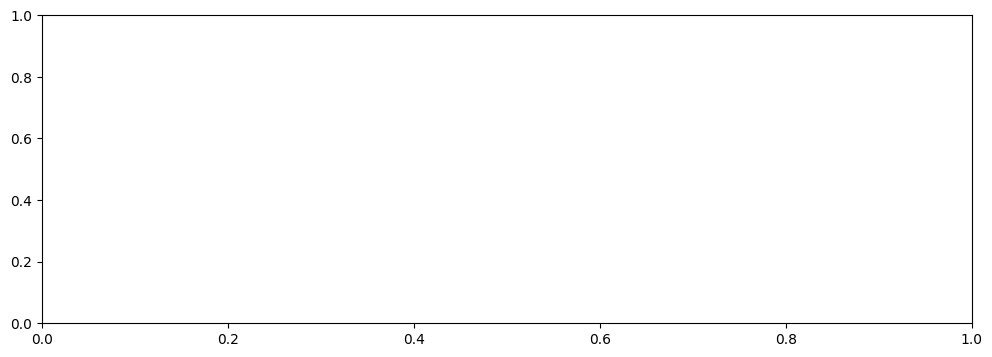

In [9]:
def millions(x, pos):
    return f'{int(x/1e6)}M'

try:
    # Make sure it is datetime
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['month'] = df['datetime'].dt.to_period('M')

    # Sort by date
    df_sorted = df.sort_values('datetime')

    # Get the latest total_dollar value from each month
    last_month_values = df_sorted.groupby('month').tail(1).set_index('month')['total_dollar']

    # Calculate monthly net change (profit/loss)
    monthly_profit_loss = last_month_values.diff().dropna()


    # Coloring
    colors = ['green' if val >= 0 else 'red' for val in monthly_profit_loss]

    fig, ax = plt.subplots(figsize=(12, 4))
    monthly_profit_loss.plot(kind='bar', color=colors, figsize=(12, 4))
    ax.set_title("Monthly net profit/loss(dollar)")
    ax.set_ylabel("Change from previous month")
    ax.set_xlabel("month")
    ax.axhline(0, color='black', linestyle='--')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig("monthly_profit_loss.png", bbox_inches='tight', dpi=300)
    # plt.show()

except Exception as e:
    print("Because on the first day, there is no comparison. :",e)



An error occurred, continuing: Invalid color argument: []


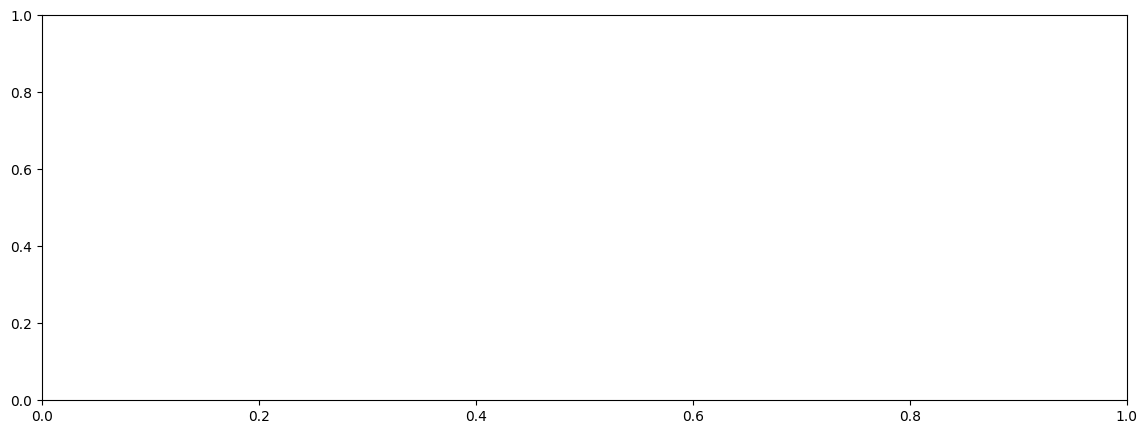

In [10]:

def millions(x, pos):
    return f'{int(x/1e6)}M'

try:
    df['datetime'] = pd.to_datetime(df['datetime'])

    df['day'] = df['datetime'].dt.to_period('D')

    df_sorted = df.sort_values('datetime')
    df_sorted = df_sorted[df_sorted['datetime'] >= df_sorted['datetime'].max() - pd.Timedelta(days=30)]

    # Get the latest `total_dollar` value for each day
    last_daily_values = df_sorted.groupby('day').tail(1).set_index('day')['total_dollar']

   # Calculate daily net change
    daily_profit_loss = last_daily_values.diff().dropna()

    # Color scheme: green for profit, red for loss
    colors = ['green' if val >= 0 else 'red' for val in daily_profit_loss]

    # Draw a diagram
    fig, ax = plt.subplots(figsize=(14, 5))
    daily_profit_loss.plot(kind='bar', color=colors, ax=ax)

    ax.set_title("Daily net profit/loss (dollar)")
    ax.set_ylabel("Change from the previous day")
    ax.set_xlabel("day")
    ax.axhline(0, color='black', linestyle='--')
    plt.xticks(rotation=90)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig("daily_profit_loss.png", bbox_inches='tight', dpi=300)
    # plt.show()

except Exception as e:
    print("An error occurred, continuing:", e)
